In [63]:
# Importing all the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Reading the csv file 
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [64]:
# Questino 1 : printing the format and the required numbers
print("***")
print("Q1", "\n")
print("Number of foods:", food.shape[0])
print("Number of Attributes:", food.shape[1])

print(food.dtypes)
print("***")

***
Q1 

Number of foods: 5740
Number of Attributes: 57
Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre 

In [67]:
#Question 2 : using mean and median function and printing the results
print("***")
print("Q2")
print("Median value of Magnesium:", round(food.loc[:,"Magnesium (Mg) (mg)"].median(), 1))
print("Mean value of Moisture:", round(food.loc[:,"Moisture (g)"].mean(), 1))
print("***")

***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture: 56.3
***


In [68]:
#Question 3

# Part a : changing the type
food["Survey ID"] = food["Survey ID"].astype("str")

# Part b : creating a new column 
food["Food category"] = food["Survey ID"].str.slice(stop=2)

# Part c : counting and finding % by dividing by the total food
counts = food["Food category"].value_counts()
per = counts["13"]/food.shape[0]*100

print("***")
print("Q3")
print("% of foods which are Cereal based products and dishes (food category 13) =", round(per, 1))
print("***")


***
Q3
% of foods which are Cereal based products and dishes (food category 13) = 15.9
***


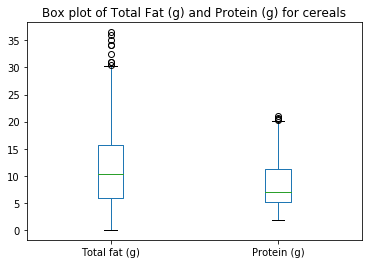

In [76]:
#Question 4
# Reducing the dataframe to food that are cereals only
cereals = food.loc[food["Food category"] == "13"]

# Using the plot "box" function
cerealsboxplot = cereals[["Total fat (g)", "Protein (g)"]]
cerealsboxplot.plot(kind="box")
plt.title("Box plot of Total Fat (g) and Protein (g) for cereals")
plt.show()

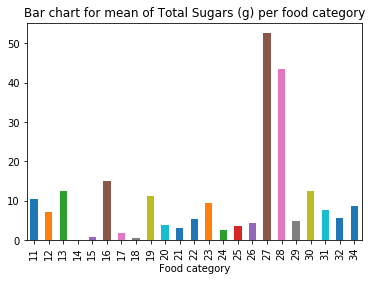

In [77]:
#Question 5
# Using groupby to create means of total sugars for each food category
categoryvssugar = food.groupby("Food category")["Total sugars (g)"].mean()

# Plotting the bar chart
categoryvssugar.plot(kind="bar")
plt.title("Bar chart for mean of Total Sugars (g) per food category")
plt.show()

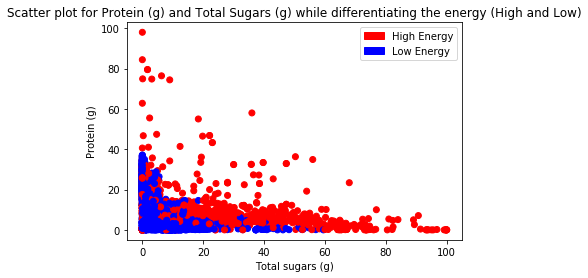

In [80]:
#Question 6

#Part a: creating a new attribute with a condtion on energy
food["EnergyLevel"] = np.where(food["Energy, with dietary fibre (kJ)"]>1000, "1", "0")

#Part b: assigning values and plotting a scatter plot
sugar = food["Total sugars (g)"]
protein = food["Protein (g)"]
energy = food["EnergyLevel"]

# Using proxy artists to create legend(from matplotlib)
red_points = mpatches.Patch(color="r", label="High Energy")
blue_points = mpatches.Patch(color="b", label="Low Energy")

# Colouring the correct data
col= np.where(energy == "1", "r", "b")

# Plotting the scatter plot
plt.scatter(sugar, protein, c = col)
plt.xlabel("Total sugars (g)")
plt.ylabel("Protein (g)")

plt.legend(handles = [red_points, blue_points], loc="upper right")

plt.title("Scatter plot for Protein (g) and Total Sugars (g) while differentiating the energy (High and Low)")
plt.show()

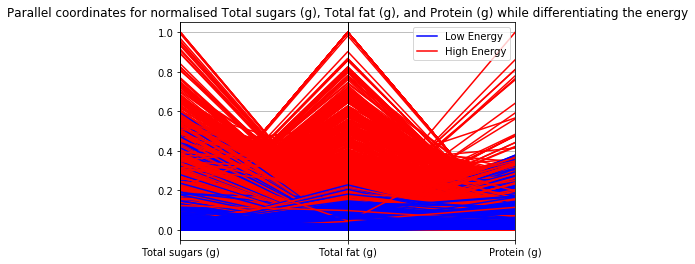

In [79]:
#Question 7

#Part a : normalising using the formula
lmt_food = food[["Total sugars (g)", "Total fat (g)", "Protein (g)"]]
lmt_food_normal = (lmt_food - lmt_food.min()) / (lmt_food.max() - lmt_food.min())
lmt_food_normal["EnergyLevel"] = food["EnergyLevel"]


#Part b : plotting the parallel coordinates

parallel_coordinates(lmt_food_normal[["Total sugars (g)", "Total fat (g)", "Protein (g)", "EnergyLevel"]], "EnergyLevel", color ='b''r')
plt.legend(["Low Energy", "High Energy"])
plt.title("Parallel coordinates for normalised Total sugars (g), Total fat (g), and Protein (g) while differentiating the energy")
plt.show()




***
Q8 

1. Fat, solid, vegetable oil based 900.8
2. Lard 900.8
3. Dripping, beef 900.8
4. Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans) 900.8
5. Ghee, clarified butter 900.3
***


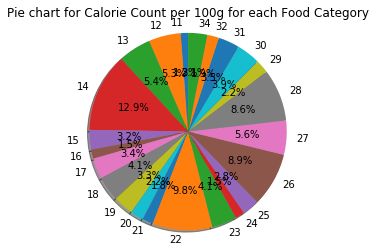

In [82]:
#Question 8

#Part a : Creating the new attribute, calorie count per 100g
food["calorie_count_per_100g"] = (4 * food["Protein (g)"]) + (4 * food["Available carbohydrates, with sugar alcohols (g)"])+ (9 * food["Total fat (g)"]) + (7 * food["Alcohol (g)"])

#Part b 

# Creating a new series of calorie count per 100g and food name as its index
foodandcal = food["calorie_count_per_100g"]
foodandcal.index = food["Food Name"]

#  Sorting the series and printing the values by the format
sortedfoodandcal = foodandcal.sort_values(ascending = False)
top5 = sortedfoodandcal[:5]
print("***")
print("Q8", "\n")
for i in range(1, 6):
    print(str(i) + ".", top5.index[i-1], round(top5[i-1], 1))
print("***")


#Part c : creating the pie chart 
categoryvscal = food.groupby("Food category")["calorie_count_per_100g"].mean()
fig1, ax1 = plt.subplots()
ax1.pie(categoryvscal, labels = categoryvscal.index, autopct='%1.1f%%',
        shadow=True, startangle = 90)
ax1.axis("equal") 
plt.title("Pie chart for Calorie Count per 100g for each Food Category")
plt.show()




In [84]:
#Question 9


#Part a : reading the other csv file as foodcat
foodcat =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)

# creating a series with the digit as the index
digitasindex = foodcat["Food Group and Sub-Group Name"]
digitasindex.index = foodcat["Food Group Code"]

# creating a seperate "Food category" series as integers
twodigitseries = food["Food category"].astype("int")

# creatiing a new series "Food category name" and adding it as a new attribute of the original data frame, food
foodcatname = digitasindex[twodigitseries]
foodcatname.index = food.index
food["Food category name"] = foodcatname

#Part b : using groupby to find total sugars mean of each food category name
foodcatnamevssugar = food.groupby("Food category name")["Total sugars (g)"].mean()

# printing with JSON format
print("{")
print('''"Mean total sugars (g) by category":''')
print("    {")
for i in range(len(foodcatnamevssugar)):
    print('''"''' + str(foodcatnamevssugar.index[i]) + '''":''', str(round(foodcatnamevssugar[i], 1)) + ''',''')
print("    }")
print("}")

{
"Mean total sugars (g) by category":
    {
"Alcoholic beverages": 4.9,
"Cereal based products and dishes": 12.5,
"Cereals and cereal products": 7.1,
"Confectionery and cereal/nut/fruit/seed bars": 43.5,
"Dairy & meat substitutes": 3.7,
"Egg products and dishes": 1.9,
"Fats and oils": 0.1,
"Fish and seafood products and dishes": 0.8,
"Fruit products and dishes": 14.9,
"Infant formulae and foods": 5.6,
"Legume and pulse products and dishes": 3.7,
"Meat, poultry and game products and dishes ": 0.5,
"Milk products and dishes": 11.1,
"Miscellaneous": 7.6,
"Non-alcoholic beverages": 10.4,
"Reptiles, amphibia and insects": 8.7,
"Savoury sauces and condiments": 9.5,
"Seed and nut products and dishes": 5.4,
"Snack foods": 4.5,
"Soup": 3.2,
"Special dietary foods": 12.5,
"Sugar products and dishes": 52.6,
"Vegetable products and dishes": 2.5,
    }
}
